In [1]:

import time
import pandas_datareader as web
from datetime import date
import seaborn as sns
from matplotlib.pylab import rcParams
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import random
import seaborn as sns
from fbprophet import Prophet

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [3]:

today = date.today() 
today_date = today.strftime("%Y-%m-%d")
first_date ='01-01-2000'
df = web.DataReader('^GSPC', data_source='yahoo', start=first_date, end=today_date)
df = pd.DataFrame(df.loc[:,'Close']) 
df.columns=['close']
df['date']=df.index
df = df.reset_index()
df = df.loc[:,['date', 'close']]
df

,date,close
0,2000-01-03,1455.219971
1,2000-01-04,1399.420044
2,2000-01-05,1402.109985
3,2000-01-06,1403.449951
4,2000-01-07,1441.469971
...,...,...
5171,2020-07-23,3235.659912
5172,2020-07-24,3215.629883
5173,2020-07-27,3239.409912
5174,2020-07-28,3218.439941


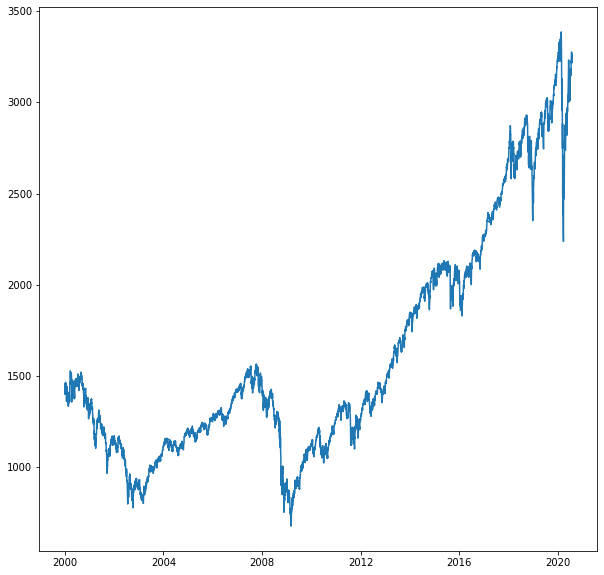

In [4]:
# Plot date and average price
plt.figure(figsize = (10, 10))
plt.plot(df['date'], df['close'])

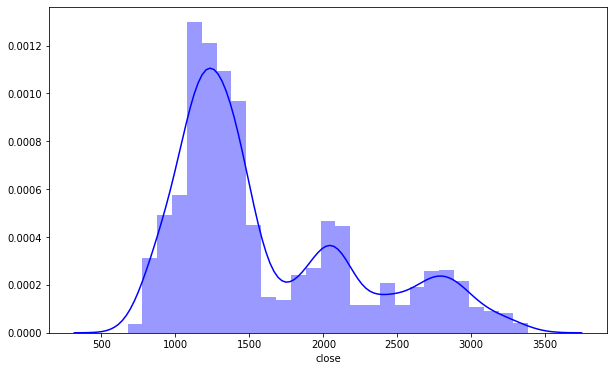

In [6]:
# Plot distribution of the average price
plt.figure(figsize = (10, 6))
sns.distplot(df['close'], color = 'b')

In [7]:
df.columns = ['ds','y']

model = Prophet()
model.fit(df)
# Forcasting into the future
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


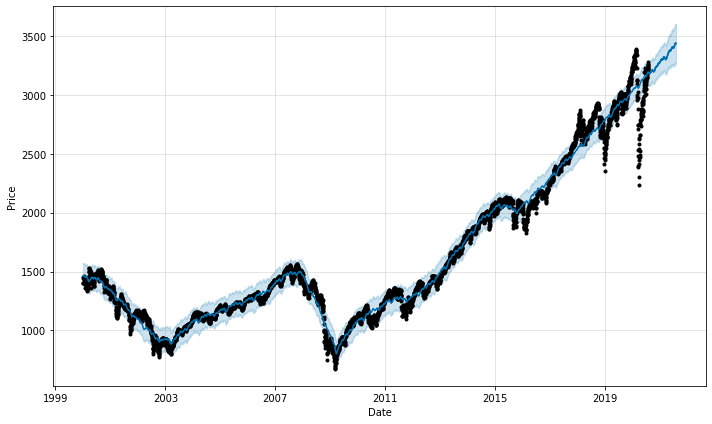

In [8]:
figure = model.plot(forecast, xlabel='Date', ylabel='Price')

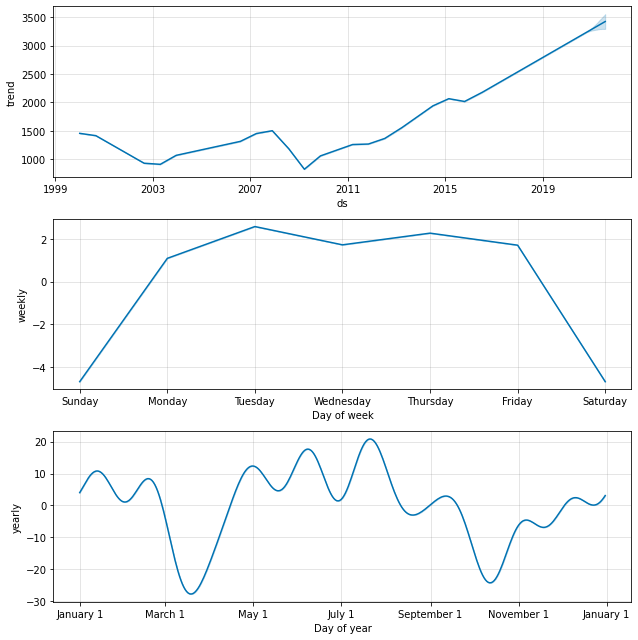

In [9]:
figure3 = model.plot_components(forecast)